<a href="https://colab.research.google.com/github/VedantMalgundkar/Simple-linear-regression-with-custom-gradient-descent-/blob/main/Gradient_descent_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [420]:
# !pip install --upgrade plotly

In [421]:
import plotly.express as px
import plotly.graph_objects as go
from IPython import display

In [422]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [423]:
# !apt install imagemagick

In [424]:
!rm -rf images
!rm -rf test.gif

In [426]:
!mkdir images

In [427]:
np.random.seed(0)
x = np.random.randn(1000,1).reshape(1,-1)[0]
y = 3 * x + 5 + np.random.normal(10,1.5,1000)

In [428]:
m=0.0
c=0.0
learning_rate = 0.01

mlst = []
clst = []
loss_lst = []

for i in range(1000):
  dldm = 0.0
  dldc = 0.0
  n = x.shape[0]
  dldm = np.sum(-x * (y - (m * x + c)))
  dldc = np.sum(-1 * (y - (m * x + c)))

  m = m - learning_rate * (1 / n) * dldm
  c = c - learning_rate * (1 / n) * dldc

  mlst.append(m)
  clst.append(c)

  yhat = m * x + c
  loss = np.divide(np.sum((y - yhat) ** 2), (2 * x.shape[0]))
  loss_lst.append(loss)




  plt.title('Updating slope and y_intercept using gradient descent to find best fit line')
  plt.xlim(x.min()-(np.mean(abs(np.diff(x)))/2), x.max()+(np.mean(abs(np.diff(x))/2)))
  plt.ylim(y.min()-(np.mean(abs(np.diff(y)))/2), y.max()+(np.mean(abs(np.diff(y)))/2))
  fig = plt.gcf()
  fig.set_size_inches(18-3, 10-3)

  plt.scatter(x, y, color='black')
  plt.xlabel('X')
  plt.ylabel('Y')


  if i in range(1, 1000, 30):
    # plt.plot(x,df3.iloc[i,:])
    plt.plot(x,yhat)
    fig.text(0.15, 0.82,
          f'Epoch                                 : {i}',
          style = 'italic',
          fontsize = 16,
          color = "green")
    fig.text(0.15, 0.77,
          f'Updated slope                   : {m:.3f}',
          style = 'italic',
          fontsize = 16,
          color = "green")
    fig.text(0.15, 0.72,
          f'Updated y-intercept          : {c:.3f}',
          style = 'italic',
          fontsize = 16,
          color = "green")
    plt.savefig(f'images/{i:003}',dpi =100 , facecolor = 'white')
    plt.close()
plt.close()

In [429]:
!convert -delay 10 images/* test.gif

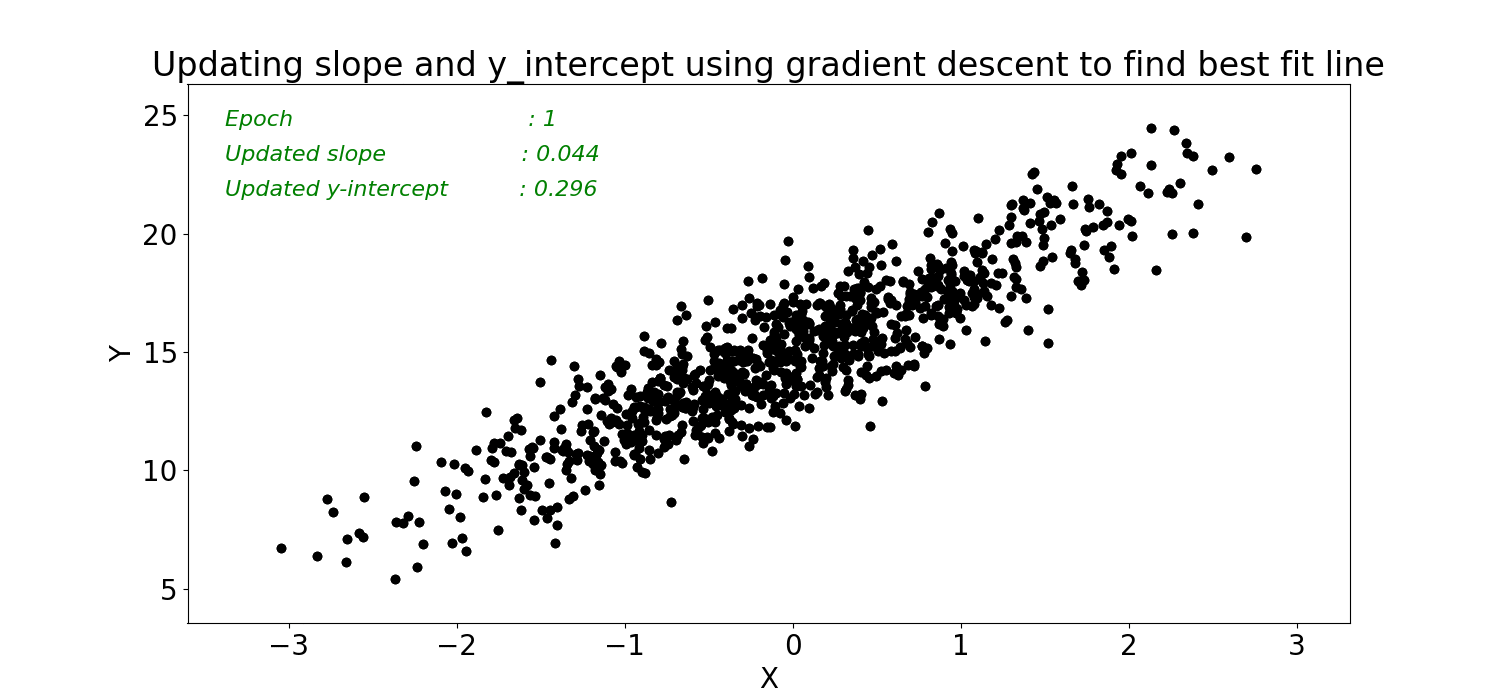

In [430]:
from IPython.display import Image
Image('/content/test.gif')

In [431]:
m_lst = np.array(mlst).reshape(-1,1)
c_lst = np.array(clst).reshape(-1,1)
loss_lst = np.round(np.array(loss_lst).reshape(-1,1),decimals = 2)

df_data = np.concatenate([m_lst,c_lst,loss_lst],1)

df = pd.DataFrame(df_data,columns = ['Slope','y-intercept','Loss'])
df['Epoch'] = df.index

df.head()

,Slope,y-intercept,Loss,Epoch
0,0.022039,0.148847,113.83,0
1,0.043930,0.296215,111.62,1
2,0.065675,0.442119,109.45,2
3,0.087273,0.586574,107.33,3
4,0.108725,0.729594,105.25,4


In [432]:
fig = px.scatter_3d(df,hover_data=['Epoch']
                    ,x=df.columns[0],y=df.columns[1],z=df.columns[2]
                    ,size_max=30
                    ,size = 'Loss')

fig.update_layout(autosize=False,width=900,height=1200)

fig.update_layout(
    height=800,
    title_text='As Epoch increases loss decreases.'
)

fig.show()